# This code simulates the swing equation for a manufacturer supplier network example

Make sure to have dynamical_networks install using pip (pip install dynamical_networks)

This code is based on the model defined in: https://www.nature.com/articles/s41598-019-49932-1

It is important to understand how the dynamics of manufacturer supplier networks behave to develop tools to better predict and avoid failures in such networks. This notebook will provide a very simple example showing how a model can be used to simulate the dynamics of such a market.

A common way that these networks can fail is when a manufacturer or supplier odes not have a resillient network for trading their goods. This is represented by few edges in the network, which makes the economy susceptible to network components failing. a component failure could occur if, for example, a nature disaster makes a component inoperable or there is a blockage in the Suez Canal blocking trade.

In [1]:
# import packages needed
from dynamical_networks.simulate.MS_network import MS_simulation, MS_network
import numpy as np
import matplotlib.pyplot as plt

### Set system parameters

Many of these system parameters will change the dynamics of the response. One needs to tune this parameters manually to find a suitable response. However, for the example the network is a simple bipartite network with parameters chosen such that the economy is stable and all suppliers and manufacturers reach a steady state with no network failures. 

In [2]:
M = np.zeros((5,))+0.1                    #current throughput of manufacturer
S = np.zeros((3,))+0.1                     #current throughput of supplier 
m = len(M)
s = len(S)
a = np.ones(s*m)
edge_density = 0.7
a[:int((m*s)*(1-edge_density))] = 0
np.random.shuffle(a)
A_MS = a.reshape((m,s))        #adjacency matrix for M/S connections

for i in range(len(A_MS)):
    if np.sum(A_MS[i]) == 0:
        j = int(np.random.uniform(0,len(A_MS[i]),1))
        A_MS[i][j] = 1
for i in range(len(A_MS.T)):
    if np.sum(A_MS.T[i]) == 0:
        j = int(np.random.uniform(0,len(A_MS.T[i]),1))
        A_MS[j][i] = 1
print(A_MS)

K_M = np.zeros((m,))+0.1      #maximum throughput of manufacturer
K_M[0] = 0.13
K_S = np.zeros((s,))+0.1       #maximum throughput of supplier (with optimal K_M)
alpha_M = 0.01                     #internal perturbation of manufacturer
alpha_S = 0.01                      #internal perturbation of supplier
B_M1 = np.zeros((m,m))+1.0        #effects of price competition on manufacturer
B_S1 = np.zeros((s,s))+4.0        #effects of price competition on supplier
B_M2 = np.zeros((m,m))+0.5          #effects of technology competition on manufacturer
B_S2 = np.zeros((s,s))+0.5          #effects of technology competition on supplier
mu_M = np.zeros((m,))               #Manufacturer production outsourcing intensity
mu_S = np.zeros((s,))               #Supplier production outsourcing intensity
h = 2

parameters = [M, K_M, alpha_M, B_M1, B_M2, mu_M,S, K_S, alpha_S, B_S1, B_S2, mu_S, h, A_MS]
fs, L = 200, 30
t = np.linspace(0, L,int(L*fs))

[[1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]
 [0. 0. 1.]
 [1. 1. 1.]]


### Run Simulation

This simulation uses the following equations of motion (see linked paper at top):
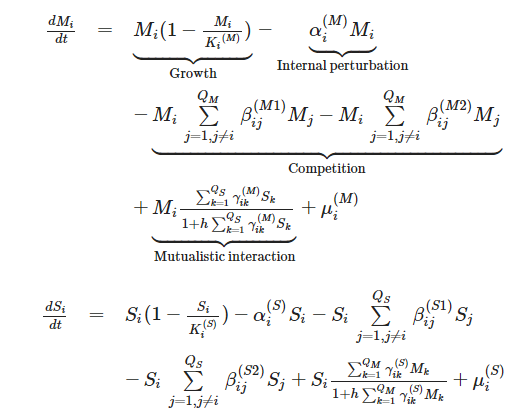


Blue vertices are manufacturers and green are suppliers. The make graph plot variable was turned on so that the edge connections could be visualized.

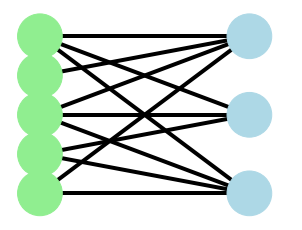

In [3]:
M_arr, S_arr = MS_simulation(t, parameters)
A = MS_network(A_MS, M_arr, S_arr, make_graph_plot = True)

### Show Resulting Throughputs

The dynamics of the resulting network are measured through the throughput of the manufacturers and suppliers. These are values associated to the vertices, but simple functions can extend them to the edge weights.

As can be seen in the following figures, the dynamics of the suppler-manufacturer network reach a steady state with the given parameters.

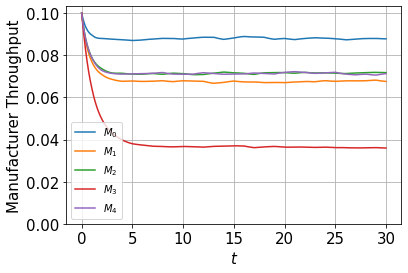

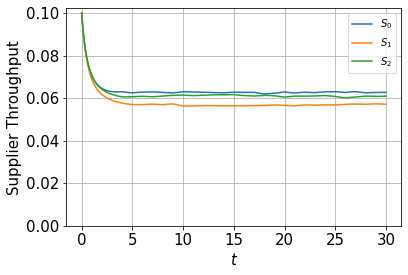

In [4]:
#plot resulting simulation throughput
TextSize = 15
for i in range(len(M_arr[0])):
    plt.plot(t, M_arr.T[i], label = r'$M_{'+str(i)+'}$')
plt.legend()
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.ylabel(r'Manufacturer Throughput', size = TextSize)
plt.ylim(0,)
plt.grid()
plt.show()

for i in range(len(S_arr[0])):
    plt.plot(t, S_arr.T[i], label = r'$S_{'+str(i)+'}$')
plt.legend()
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.ylabel(r'Supplier Throughput', size = TextSize)
plt.ylim(0,)
plt.grid()
plt.show()